# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# EDA

In [3]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,0.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,1.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,0.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,0.0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


In [4]:
def null_search(df):
    for i  in df.columns:
        print("["+i+"]")
        print("NULL数:" + str(df[i].isnull().sum())   +
             "           NULL率" +  str((df[i].isnull().sum()/len(df)).round(3)) +
             "          データの種類数:" + str(df[i].value_counts().count())+
             "          データのタイプ:" +str(df[i].dtypes))

In [5]:
null_search(df_train)

[PassengerId]
NULL数:0           NULL率0.0          データの種類数:891          データのタイプ:int64
[Survived]
NULL数:0           NULL率0.0          データの種類数:2          データのタイプ:int64
[Pclass]
NULL数:0           NULL率0.0          データの種類数:3          データのタイプ:int64
[Name]
NULL数:0           NULL率0.0          データの種類数:891          データのタイプ:object
[Sex]
NULL数:0           NULL率0.0          データの種類数:2          データのタイプ:int64
[Age]
NULL数:177           NULL率0.199          データの種類数:88          データのタイプ:float64
[SibSp]
NULL数:0           NULL率0.0          データの種類数:7          データのタイプ:int64
[Parch]
NULL数:0           NULL率0.0          データの種類数:7          データのタイプ:int64
[Ticket]
NULL数:0           NULL率0.0          データの種類数:681          データのタイプ:object
[Fare]
NULL数:0           NULL率0.0          データの種類数:248          データのタイプ:float64
[Cabin]
NULL数:687           NULL率0.771          データの種類数:147          データのタイプ:object
[Embarked]
NULL数:2           NULL率0.002          データの種類数:3          データのタイプ:float64


## データの各特徴量とその意味の確認
<ul>PassengerId – 乗客識別ユニークID</ul>
<ul>Survived – 生存フラグ（0=死亡、1=生存）</ul>
<ul>Pclass – チケットクラス（1=上層クラス、2=中級クラス（一般階級）、3=下層クラス（労働階級））</ul>
<ul>Name – 乗客の名前</ul>
<ul>Sex – 性別（male=男性、female＝女性）</ul>
<ul>Age – 年齢</ul>
<ul>SibSp – タイタニックに同乗している兄弟/配偶者の数</ul>
<ul>parch – タイタニックに同乗している親/子供の数</ul>
<ul>ticket – チケット番号</ul>
<ul>fare – 料金</ul>
<ul>cabin – 客室番号</ul>
<ul>Embarked – 出港地（タイタニックへ乗った港）（C=Cherbourg、Q=Queenstown、S=Southampton）</ul>
<ul>タイタニックの航路としてはS（出発地点）→C→Q→目的地の順。しかし、S、C、Qの距離はそれほど離れていない。</ul>

# Replace Categorical Values With Numeric Values

In [4]:
df_train = pd.read_csv('train.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
df_test = pd.read_csv('test.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
df_train_original=pd.read_csv("train.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
df_test_original=pd.read_csv("test.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
df_all_v1 = pd.concat((df_train,df_test)).replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
df_all = df_all_v1.reset_index(drop=True)

In [6]:
#欠損値の個数確認
df_train.isnull().sum()[df_train.isnull().sum() != 0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

In [7]:
df_test.isnull().sum()[df_test.isnull().sum() !=0].sort_values(ascending=False)

Cabin    327
Age       86
Fare       1
dtype: int64

In [8]:
df_train[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,NaN,0.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,2.0
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,1.0
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,NaN,1.0


In [9]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
groupby_sex = df_train.groupby('Sex')
for sex, value in groupby_sex['Age']:
    print((sex,value.mean()))

(0, 30.72664459161148)
(1, 27.915708812260537)


In [11]:
df_all.dropna(subset=["Age"])#これだけでは欠損値は消えない

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,0.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,1.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,0.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,0.0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450
6,54.0,E46,0.0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463
7,2.0,NaN,0.0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909
8,27.0,NaN,0.0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742
9,14.0,NaN,1.0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736
10,4.0,G6,0.0,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,1,1,1.0,PP 9549


In [12]:
df_all.dropna(subset=["Age"],inplace=True)#これでようやく消すことができる

In [13]:
df_all["Age"].isnull().sum()

0

In [14]:
len(df_all)

1046

In [15]:
#最尤推定を行う
mu_ML = df_all["Age"].sum()/len(df_all)
sigma_ML = np.sqrt(((df_all["Age"]-mu_ML)**2).sum()/len(df_all))
print('最尤推定平均:',mu_ML, '最尤推定標準偏差:',sigma_ML)

最尤推定平均: 29.881137667304014 最尤推定標準偏差: 14.406601748667827


In [16]:
Age_average = df_train['Age'].mean()
Age_std = df_train['Age'].std()
print('平均train:',Age_average,'分散train:',Age_std)

平均train: 29.69911764705882 分散train: 14.526497332334042


(array([ 54.,  58., 229., 212., 174.,  84.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

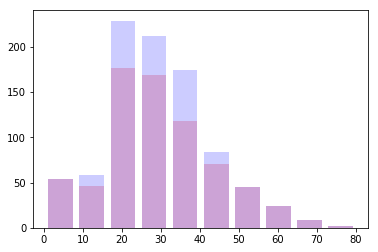

In [17]:
Age_nullcount = df_train["Age"].isnull().sum()
rand = np.random.randint(mu_ML-sigma_ML, mu_ML + sigma_ML, size = Age_nullcount)

df_train["Age"][np.isnan(df_train["Age"])]=rand

plt.hist(df_train_original["Age"].dropna(),alpha=0.2,color='r',rwidth=0.8)
plt.hist(df_train["Age"].dropna(),alpha=0.2,color='b',rwidth=0.8)

(array([ 16.,  18.,  89., 125.,  70.,  48.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

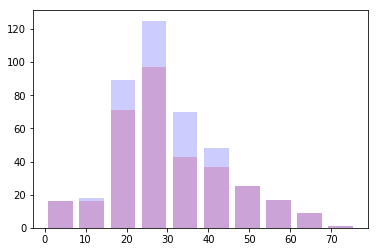

In [18]:
#testデータのAgeについても同じように補完する
Age_nullcountv2 = df_test["Age"].isnull().sum()
randv2 = np.random.randint(mu_ML-sigma_ML, mu_ML + sigma_ML, size = Age_nullcountv2)

df_test["Age"][np.isnan(df_test["Age"])]=randv2

plt.hist(df_test_original["Age"].dropna(),alpha=0.2,color='r',rwidth=0.8)
plt.hist(df_test["Age"].dropna(),alpha=0.2,color='b',rwidth=0.8)

In [19]:
y_train =df_train["Survived"].values
#df_train.drop(["Survived","Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True)
df_train.drop(["Survived","PassengerId"],axis=1,inplace=True)

In [20]:
#EmbarkedにNaNが含まれる行を削除→除去はせずに埋める
#df_train.dropna(subset=['Embarked'], inplace=True)
df_train[df_train['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [21]:
print(df_all.groupby(["Pclass"]).agg(["mean"])["Fare"])
print(df_all.groupby(["Embarked"]).agg(["mean"])["Fare"])

             mean
Pclass           
1       92.229358
2       21.855044
3       12.879299
               mean
Embarked           
0.0       28.190956
1.0       72.474158
2.0       15.905918


In [22]:
#df_train.fillna({'Sex': 'female', 'Embarked': 'C'}, inplace=True)
df_train.fillna({'Sex': 1, 'Embarked': 1}, inplace=True)

In [23]:
df_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [24]:
#残り特徴量を作成＆いじいじ
combine1 = [df_train]

for df_train in combine1:
    df_train['Salutation'] = df_train.Name.str.extract(' ([A-Za-z]+).', expand=False)

for df_train in combine1: 
        df_train['Salutation'] = df_train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        df_train['Salutation'] = df_train['Salutation'].replace('Mlle', 'Miss')
        df_train['Salutation'] = df_train['Salutation'].replace('Ms', 'Miss')
        df_train['Salutation'] = df_train['Salutation'].replace('Mme', 'Mrs')
        del df_train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for df_train in combine1: 
        df_train['Salutation'] = df_train['Salutation'].map(Salutation_mapping) 
        df_train['Salutation'] = df_train['Salutation'].fillna(0) 
        
for df_train in combine1: 
        df_train['Ticket_Lett'] = df_train['Ticket'].apply(lambda x: str(x)[0])
        df_train['Ticket_Lett'] = df_train['Ticket_Lett'].apply(lambda x: str(x)) 
        df_train['Ticket_Lett'] = np.where((df_train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df_train['Ticket_Lett'], np.where((df_train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        df_train['Ticket_Len'] = df_train['Ticket'].apply(lambda x: len(x)) 
        del df_train['Ticket'] 
df_train['Ticket_Lett']=df_train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for df_train in combine1: 
    df_train['Cabin_Lett'] = df_train['Cabin'].apply(lambda x: str(x)[0]) 
    df_train['Cabin_Lett'] = df_train['Cabin_Lett'].apply(lambda x: str(x)) 
    df_train['Cabin_Lett'] = np.where((df_train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),df_train['Cabin_Lett'], np.where((df_train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
    
del df_train['Cabin'] 
df_train['Cabin_Lett']=df_train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1) 
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
for df_train in combine1:
    df_train['IsAlone'] = 0
    df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1

In [25]:
#testに関しても同様にする
combine2 = [df_test]

for df_test in combine2:
    df_test['Salutation'] = df_test.Name.str.extract(' ([A-Za-z]+).', expand=False)

for df_test in combine2: 
        df_test['Salutation'] = df_test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        df_test['Salutation'] = df_test['Salutation'].replace('Mlle', 'Miss')
        df_test['Salutation'] = df_test['Salutation'].replace('Ms', 'Miss')
        df_test['Salutation'] = df_test['Salutation'].replace('Mme', 'Mrs')
        del df_test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for df_test in combine2: 
        df_test['Salutation'] = df_test['Salutation'].map(Salutation_mapping) 
        df_test['Salutation'] = df_test['Salutation'].fillna(0) 
        
for df_test in combine2: 
        df_test['Ticket_Lett'] = df_test['Ticket'].apply(lambda x: str(x)[0])
        df_test['Ticket_Lett'] = df_test['Ticket_Lett'].apply(lambda x: str(x)) 
        df_test['Ticket_Lett'] = np.where((df_test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df_test['Ticket_Lett'], np.where((df_test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        df_test['Ticket_Len'] = df_test['Ticket'].apply(lambda x: len(x)) 
        del df_test['Ticket'] 
df_test['Ticket_Lett']=df_test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for df_test in combine2: 
    df_test['Cabin_Lett'] = df_test['Cabin'].apply(lambda x: str(x)[0]) 
    df_test['Cabin_Lett'] = df_test['Cabin_Lett'].apply(lambda x: str(x)) 
    df_test['Cabin_Lett'] = np.where((df_test['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),df_test['Cabin_Lett'], np.where((df_test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
    
del df_test['Cabin'] 
df_test['Cabin_Lett']=df_test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1) 
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1
for df_test in combine2:
    df_test['IsAlone'] = 0
    df_test.loc[df_test['FamilySize'] == 1, 'IsAlone'] = 1

In [26]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0.0,1.0,3,9,0,2,0
1,1,1,38.0,1,0,71.2833,1.0,3.0,0,8,1,2,0
2,3,1,26.0,0,0,7.9250,0.0,2.0,3,16,0,1,1
3,1,1,35.0,1,0,53.1000,0.0,3.0,1,6,1,2,0
4,3,0,35.0,0,0,8.0500,0.0,1.0,3,6,0,1,1


In [27]:
null_search(df_train)

[Pclass]
NULL数:0           NULL率0.0          データの種類数:3          データのタイプ:int64
[Sex]
NULL数:0           NULL率0.0          データの種類数:2          データのタイプ:int64
[Age]
NULL数:0           NULL率0.0          データの種類数:88          データのタイプ:float64
[SibSp]
NULL数:0           NULL率0.0          データの種類数:7          データのタイプ:int64
[Parch]
NULL数:0           NULL率0.0          データの種類数:7          データのタイプ:int64
[Fare]
NULL数:0           NULL率0.0          データの種類数:248          データのタイプ:float64
[Embarked]
NULL数:0           NULL率0.0          データの種類数:3          データのタイプ:float64
[Salutation]
NULL数:0           NULL率0.0          データの種類数:6          データのタイプ:float64
[Ticket_Lett]
NULL数:0           NULL率0.0          データの種類数:4          データのタイプ:int64
[Ticket_Len]
NULL数:0           NULL率0.0          データの種類数:15          データのタイプ:int64
[Cabin_Lett]
NULL数:0           NULL率0.0          データの種類数:3          データのタイプ:int64
[FamilySize]
NULL数:0           NULL率0.0          データの種類数:9          データのタイプ:int64
[IsAlone]
NULL数:0           NULL率0.0   

In [28]:
#df_test.head()
df_test.drop(["PassengerId"],axis=1,inplace=True)

In [29]:
#df_train_onehot = pd.get_dummies(df_train)
#df_test_onehot = pd.get_dummies(df_test)

In [30]:
#df_allを見てみて、Pclassが３の中央値fareでNaNを埋める
df_all_fare = df_all.groupby(["Pclass"]).agg(["median"])["Fare"]
pclass3 = df_all_fare['median'][2]
print(pclass3)

15.75


In [31]:
df_test.fillna({'Sex': 'male', 'Fare': pclass3}, inplace=True)
#df_test

In [32]:
#df_train_onehot = pd.get_dummies(df_train)
#df_test_onehot = pd.get_dummies(df_test)

In [33]:
#print('学習データの欠損：',df_train_onehot.isnull().sum(),'テストデータの欠損:',df_test_onehot.isnull().sum())
print('学習データの欠損：',df_train.isnull().sum(),'テストデータの欠損:',df_test.isnull().sum())

学習データの欠損： Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Salutation     0
Ticket_Lett    0
Ticket_Len     0
Cabin_Lett     0
FamilySize     0
IsAlone        0
dtype: int64 テストデータの欠損: Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Salutation     0
Ticket_Lett    0
Ticket_Len     0
Cabin_Lett     0
FamilySize     0
IsAlone        0
dtype: int64


In [34]:
from sklearn .model_selection import GridSearchCV, train_test_split
#X_train,X_test,y_trainv2,y_test  = train_test_split(df_train_onehot, y_train, test_size =0.3, random_state=1234)
X_train,X_test,y_trainv2,y_test  = train_test_split(df_train, y_train, test_size =0.3, random_state=1234)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

In [36]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [37]:
npX = np.array(X_train).copy()
npy = np.array(y_trainv2).copy()

In [40]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [41]:
mode

,score
XGBoost,0.825013
Bagging,0.823477
RandomForest,0.812135
LogisticRegression,0.810445
AdaBoost,0.797696
ExtraTrees,0.788070
DecisionTree,0.770558
SVM,0.733513


In [48]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 上記のパラメータでモデルを学習する
model = lgb.LGBMClassifier()
#model.fit(df_train_onehot, y_train)
model.fit(df_train, y_train)
#予測
#y_prediction = model.predict(df_test_onehot)
y_prediction = model.predict(df_test)

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
PassengerId = np.array(df_test_original['PassengerId']).astype(int)

In [51]:
result = pd.DataFrame(y_prediction, PassengerId, columns=["Survived"])
result.to_csv("resultv2.csv", index_label=["PassengerId"])